In [6]:
import pickle 

with open('DNN_score','rb') as f:
    scoreDNN = pickle.load(f)

with open('CNN_score','rb') as f:
    scoreCNN = pickle.load(f)

with open('CNN_rgb_score','rb') as f:
    scoreCNN_rgb = pickle.load(f)

print(scoreDNN)
print(scoreCNN)
print(scoreCNN_rgb)

[0.836614191532135, 0.8410433232784271, 0.8316929191350937, 0.8444882035255432, 0.8415354490280151, 0.8464567065238953, 0.835137814283371, 0.8400590717792511, 0.838090568780899, 0.8489173352718353]
[0.8342768400907516, 0.8372899889945984, 0.8382030725479126, 0.8448685109615326, 0.8373812884092331, 0.8479729741811752, 0.835646465420723, 0.8364682197570801, 0.8434076011180878, 0.837837815284729]
[0.8607283532619476, 0.8567913472652435, 0.8661417365074158, 0.8646653592586517, 0.8612204790115356, 0.8651574850082397, 0.8494094610214233, 0.8562992215156555, 0.8444882035255432, 0.8725393712520599]


In [12]:
import pickle
import keras
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import cross_val_score, train_test_split


names = []
classifiers = []
for files in glob.glob('CLF*'):
    if ('CNN' not in files) and ('dense' not in files): 
        with open(files, 'rb') as f:
            classifiers.append(pickle.load(f))
            names.append(files.split('/')[-1])

with open('img_data','rb') as f:
    data = pickle.load(f)
with open('img_labels','rb') as f:
    labels = pickle.load(f)

print(classifiers)
print(names)

[ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False), SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='distance'), AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                        

In [7]:
scores = []
for model in classifiers:
    score = cross_val_score(model, data, labels, cv=10, n_jobs=-1, verbose=1)
    print(score)
    scores.append(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.73701843 0.72864322 0.72026801 0.72529313 0.77051926 0.74204355
 0.70805369 0.75       0.72147651 0.72651007]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.88274707 0.87102178 0.85092127 0.84757119 0.86097152 0.85762144
 0.86577181 0.84060403 0.85234899 0.8590604 ]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.87772194 0.86599665 0.8559464  0.85929648 0.86097152 0.85427136
 0.85234899 0.86577181 0.86073826 0.86744966]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.87102178 0.86097152 0.83417085 0.84589615 0.84589615 0.85929648
 0.84395973 0.83053691 0.86577181 0.86744966]
[0.87772194 0.87102178 0.8559464  0.85762144 0.8559464  0.85427136
 0.83557047 0.83053691 0.85738255 0.86073826]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 33.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.89782245 0.88442211 0.87939698 0.8559464  0.87939698 0.86767169
 0.88255034 0.86073826 0.86912752 0.87583893]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.8min finished


In [13]:
scores.append(scoreDNN)
names.append('CLF_denseNN')
scores.append(scoreCNN)
names.append('CLF_CNN_gray')
scores.append(scoreCNN_rgb)
names.append('CLF_CNN')

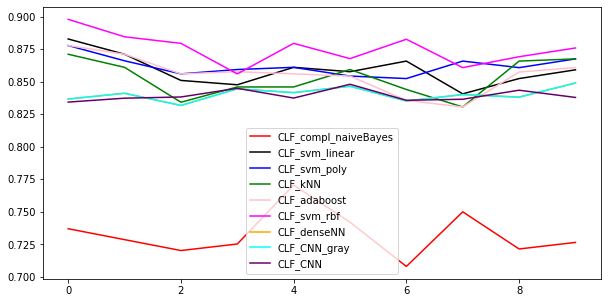

In [14]:
colors = ['red','black','blue','green','pink','magenta','orange','cyan',[102/255.0,0.0,102/255.0]]

plt.figure(figsize=(10,5))
for score,name,color in zip(scores,names,colors):
    plt.plot(score, label=name, c=color)
plt.legend(loc='best')
plt.show()